## PROJECT - (24th, July 2020  - 9th Aug, 2020) 

## 1. Importing necessary Libraries

In [686]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

## 2. Read the data frame

In [685]:
## loading the file from the library

df = pd.read_csv('insurance.csv') 


## 3. Perform basic EDA

In [622]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [623]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [624]:
df.shape

(1338, 7)

In [625]:
df.size

9366

In [626]:
df.dtypes      #Providing the data type of each value

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [628]:
df.isnull().sum()           #Checking presence of missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [762]:
df.count()               #Checking if the data is complete

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [630]:
df.describe()            #Loading the 5 point summary 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


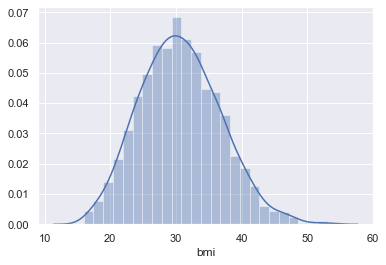

In [631]:
## Using histograms as visual representations to measure the skewness of the data

sns.distplot(df['bmi']);

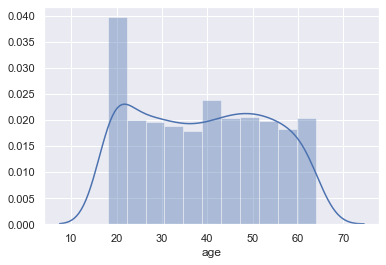

In [632]:
sns.distplot(df['age']);

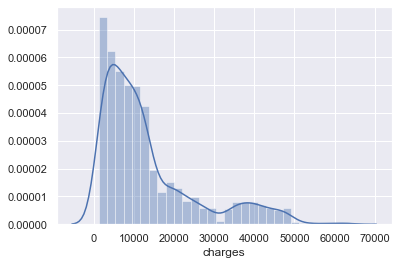

In [633]:
sns.distplot(df['charges']);

In [634]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi), stats.skew(df.age), stats.skew(df.charges)]},
                       index = ['bmi','age','charges'])

Skewness    #Fidning the skewness level of each column

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


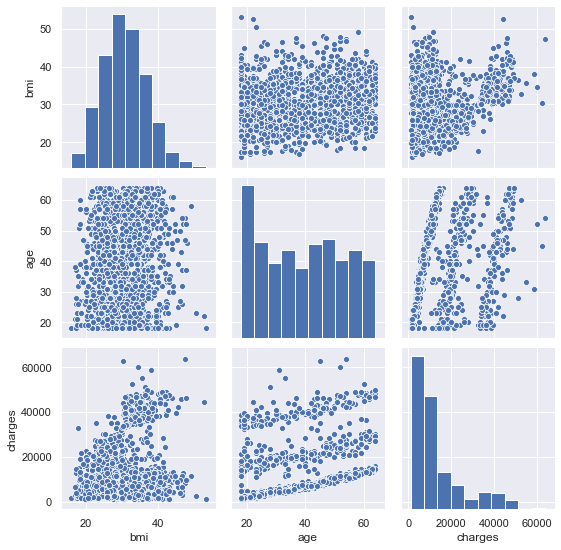

In [635]:
## Using pairplots as distribution factor for quantitative variables

sns.pairplot(df[['bmi','age','charges']]);

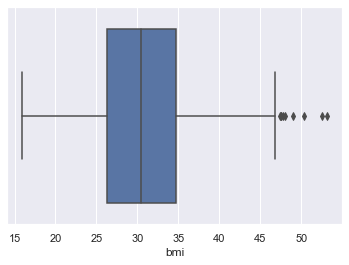

In [636]:
## Checking the presence of outliers hence using boxplots to reflect the same

sns.boxplot(df['bmi']);

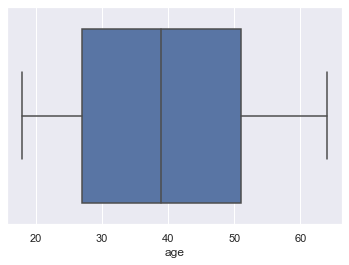

In [637]:
sns.boxplot(df['age']);

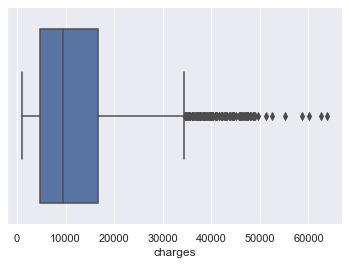

In [638]:
sns.boxplot(df['charges']);

In [639]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [640]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [641]:
data = df.copy()

In [652]:
## Changing values of catergorical variables inorder to plot a pariplot

df['sex'] = data['sex'].map({'females' : 0, 'males' : 1})
df['region'] = data['region'].map({'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4 })
df['smoker'] = data['smoker'].map({'yes' : 1, 'no' : 0})

In [653]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,1,1,16884.92400
1,18,NaN,33.770,1,0,2,1725.55230
2,28,NaN,33.000,3,0,2,4449.46200
3,33,NaN,22.705,0,0,3,21984.47061
4,32,NaN,28.880,0,0,3,3866.85520


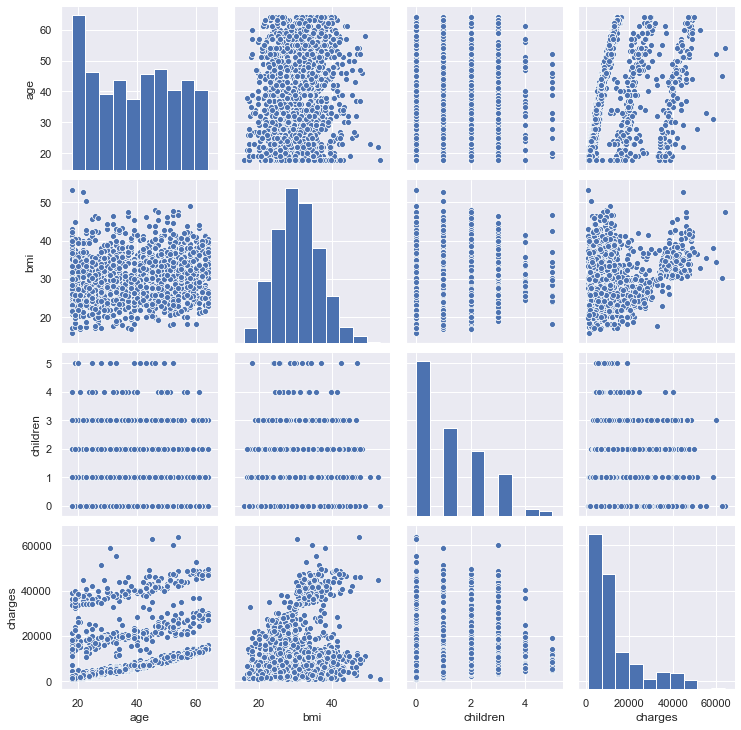

In [654]:
sns.pairplot(data);      

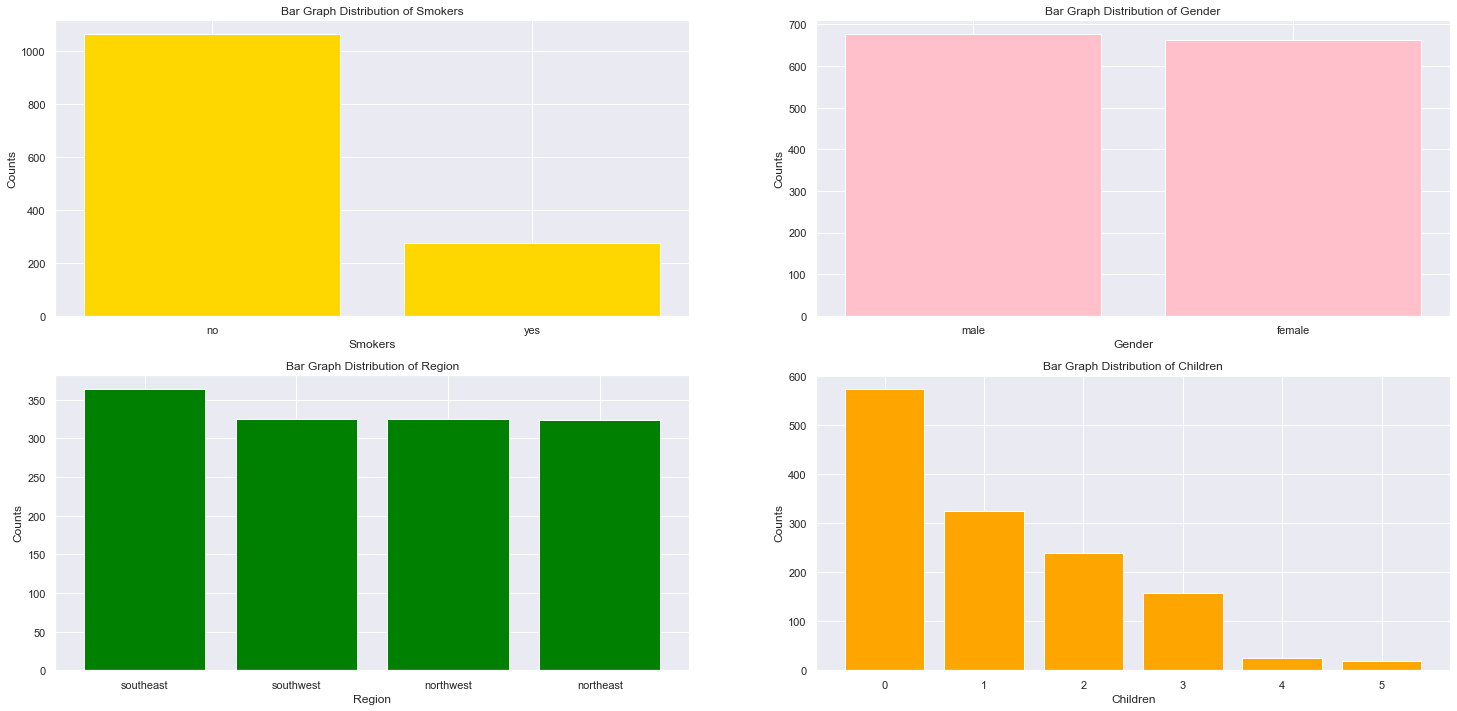

In [682]:
## Plotting distribution of categorical variables

plt.figure(figsize=(25,25))

x = data.smoker.value_counts().index         # Values of x
y = [data['smoker'].value_counts()[i] for i in x]      # couting each value on y

plt.subplot(4,2,1)                           #plot shape(4plots, 2 columns)
plt.bar(x,y, align='center', color='gold')             #plotting bar graph
plt.title('Bar Graph Distribution of Smokers')
plt.xlabel('Smokers')
plt.ylabel('Counts')

x1 = data.sex.value_counts().index           # Values of x
y1 = [data['sex'].value_counts()[j] for j in x1]        # couting each value on y
 

plt.subplot(4,2,2)                           #plot shape(4plots, 2 columns)
plt.bar(x1,y1, align='center', color='pink')            #plotting bar graph
plt.title('Bar Graph Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')

x2 = data.region.value_counts().index       # Values of x
y2 = [data['region'].value_counts()[k] for k in x2]     # couting each value on y

plt.subplot(4,2,3)                          #plot shape(4plots, 2 columns)
plt.bar(x2,y2, align='center', color='green')           #plotting bar graph
plt.title('Bar Graph Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Counts')


x3 = data.children.value_counts().index
y3 = [data['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center', color='orange')
plt.title('Bar Graph Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Counts')

plt.show()

## 4.a Do charges of people who smoke differ significantly from the people who dont?

In [688]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [771]:
## Proving whether the null hypothesis is true
## Using the t-test

Ho = "Smokers and non-smokers charges are the same"
Ha = "Smokers and non-smokers charges differ significantly"

x = data[data.smoker == 'yes'].charges    # Charges relating to smokers
y = data[data.smoker == 'no'].charges     # Charges relating to non-smokers

t, p_value = ttest_ind(x,y, axis=0)


if p_value < 0.05:  # keeping the significance level at 0.5
    print(f''' Smokers and non-smokers charges differ significantly from p-value {(p_value)} < 0.05,
          \t we reject the Null Hypothesis ''')
    
else:
    print(f'''Smokers and non-smokers charges are the same p-value {(p_value)} > 0.05,
    \t we Fail to Reject the Null Hypothesis''')

 Smokers and non-smokers charges differ significantly from p-value 8.271435842177219e-283 < 0.05,
          	 we reject the Null Hypothesis 


In [724]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

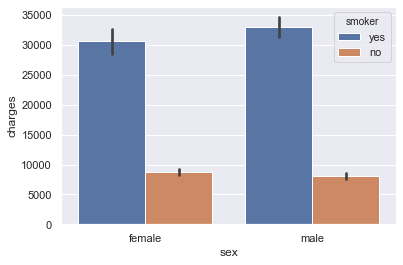

In [725]:
sns.barplot(data['sex'],data['charges'], hue=data['smoker'])

## b. Does bmi of males differ significantly from females?

In [775]:
## Proving whether the null hypothesis is true
## Using the t-test

Ho = "BMI of Males and Females are the same"
Ha = "BMI of Males and Females are significantly different"

x = data[data.sex == 'male'].bmi         #Values of bmi for males
y = data[data.sex == 'female'].bmi      # Values of bmi for females

t,p_value = stats.ttest_ind(x,y, axis=0)


if p_value < 0.05:         # keeping the significance level at 0.05
    print(f''' BMI of Males and Females are significantly different from p-value ({p_value.round(4)}) <0.05,
    \t we fail to reject the Null Hypothesis''')
    
else:
    print(f''' BMI of Males and Females are the same p-value({p_value.round(4)}) > 0.05,
    \t we reject the Null Hypothesis''')

 BMI of Males and Females are the same p-value(0.09) > 0.05,
    	 we reject the Null Hypothesis


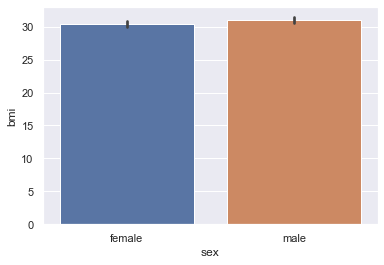

In [722]:
sns.barplot(data['sex'], data['bmi'])

## c. Is the proportion of smokers significantly different in different genders ?

In [777]:
## Proving whether the null hypothesis is true
## Using Chi Square

Ho = 'Smokers significantly different among Genders'
Ha = 'Smokers significantly not different among Gende## b. Does bmi of males differ significantly from females?rs'

sample = pd.crosstab(data['sex'], data['smoker'])     

chi, p_value, dof, expected =  stats.chi2_contingency(sample)


if p_value <0.05:    # Setting the significance level at 5%
    print(f' {Ho} as the p-value is ({p_value.round(3)}) < 0.05 , we fail to reject the null Hypothesis')
    
else:
    print(f'{Ha} as the p-value ({p_value.round(3)}) > 0.05, we reject the null hypothesis')

 Smokers significantly different among Genders as the p-value is (0.007) < 0.05 , we fail to reject the null Hypothesis


## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [761]:
## Proving whether the null hypothesis is true
## Using F-Test

from scipy.stats import f_oneway

Ho = 'Number of children does not affect BMI'
Ha = 'Number of children does affect BMI'


sample  = data[data['sex'] == 'female']

zero = sample[sample.children == 0]['bmi']      #bmi with no children
one = sample[sample.children == 1]['bmi']       #bmi with one child
two = sample[sample.children == 2]['bmi']       #bmi with two children 

stat, p_value = f_oneway(zero,one,two)


if p_value < 0.05:      # Setting th significance level at 0.05
    print(f' {Ho} as the p-value ({p_value.round(3)}) < 0.05, we fail to reject the null hypothesis')
    
else:
    print(f' {Ha} as the p-value ({p_value.round(3)}) > 0.05, we reject the null hypothesis')

 Number of children does affect BMI as the p-value (0.716) > 0.05, we reject the null hypothesis
